In [1]:
from datetime import datetime

import pandas as pd

from backtest.fetcher import MarketDataFetcher
from backtest.strategy import SimpleMovingAverageStrategy
from backtest.simulator import TradeSimulator
from backtest.pnl import PnLCalculator

In [2]:
fetcher = MarketDataFetcher()
df = fetcher.get_historical_ohlcv(
        symbol="BTCUSDT",
        interval="1m",
        start="2025-12-01",
        end="2025-12-10",
    )

In [3]:
df.head(5)

,open,high,low,close,volume
timestamp,,,,,
2025-12-01 07:00:00,90360.01,90417.00,90268.77,90408.34,59.95250
2025-12-01 07:01:00,90408.34,90408.34,90300.00,90300.01,9.99673
2025-12-01 07:02:00,90300.01,90340.25,90278.33,90305.55,31.79438
2025-12-01 07:03:00,90305.55,90305.55,90194.27,90194.27,57.04552
2025-12-01 07:04:00,90194.28,90194.28,89510.00,89816.17,503.41775


In [4]:
strategy = SimpleMovingAverageStrategy(
    fast_window=10,
    slow_window=40,
)

In [5]:
signals = strategy.generate_signals(df)

In [6]:
simulator = TradeSimulator(
    initial_cash=1000,
    risk_per_trade=20,
)

In [7]:
trades, equity_curve = simulator.run(
    price_series=df["close"],
    signals=signals,
)

<Axes: >

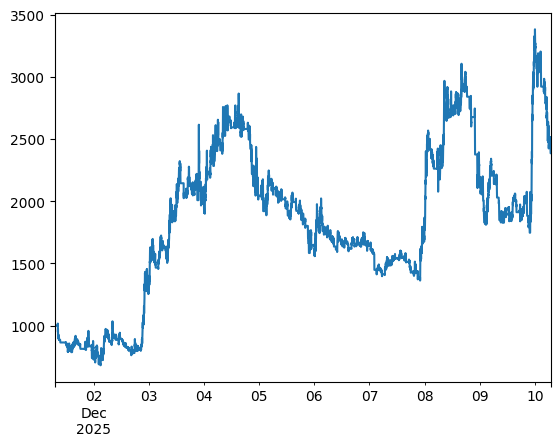

In [8]:
import matplotlib.pyplot as plt

equity_curve.plot()

In [9]:

pnl_calc = PnLCalculator()
summary = pnl_calc.summarize(trades, equity_curve)


In [10]:
pnl_calc.print_summary(print_trades=False)


========== BACKTEST SUMMARY ==========
--------------------------------------
Start equity     : 1000.00
End equity       : 2385.45
Total return     : 138.55%
Max drawdown     : -52.46%
# of trades      : 196
Win rate         : 36.22%
